# 金融和经济数据应用
* 利用Python进行数据分析 第十一章

In [1]:
from datetime import datetime
from datetime import timedelta
from datetime import time

from dateutil.parser import parse
from IPython.display import Image

import random; random.seed(0)
import string

import pandas_datareader.data as web

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 一、数据规整化方面的话题

### 1 时间序列以及截面对齐
* 数据对齐问题（data alignment）
* pandas 可以在算术运算中自动对齐数据

In [43]:
close_px_all = pd.read_csv('py35_data/stock_px_chp11.csv', parse_dates=True, index_col=0)
rng = pd.date_range('9/6/2011', periods = 9, freq = 'D')
prices = pd.DataFrame(close_px_all[['AAPL', 'JNJ','SPX', 'XOM']], index = rng)
prices = prices.dropna()
prices

,AAPL,JNJ,SPX,XOM
2011-09-06,379.74,64.64,1165.24,71.15
2011-09-07,383.93,65.43,1198.62,73.65
2011-09-08,384.14,64.95,1185.90,72.82
2011-09-09,377.48,63.64,1154.23,71.01
2011-09-12,379.94,63.59,1162.27,71.84
2011-09-13,384.62,63.61,1172.87,71.65
2011-09-14,389.30,63.73,1188.68,72.64


In [46]:
close_px_all = pd.read_csv('py35_data/volume_chp11.csv', parse_dates=True, index_col=0)
rng = pd.date_range('9/6/2011', periods = 7, freq = 'D')
volume = pd.DataFrame(close_px_all[['AAPL', 'JNJ','SPX', 'XOM']], index = rng)
volume = volume.dropna()
volume

,AAPL,JNJ,SPX,XOM
2011-09-06,18173500.0,15848300.0,5.103980e+09,25416300.0
2011-09-07,12492000.0,10759700.0,4.441040e+09,23108400.0
2011-09-08,14839800.0,15551500.0,4.465170e+09,22434800.0
2011-09-09,20171900.0,17008200.0,4.586370e+09,27969100.0
2011-09-12,16697300.0,13448200.0,5.168550e+09,26205800.0


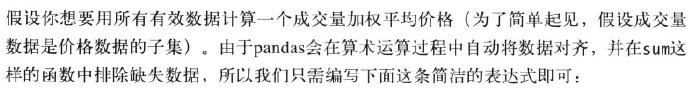

In [7]:
Image(filename="py35_picture\Time Series and Cross-Section Alignment.png")

In [47]:
prices * volume

,AAPL,JNJ,SPX,XOM
2011-09-06,3.302761e+14,2.511686e+14,2.605061e+19,6.459883e+14
2011-09-07,1.560501e+14,1.157711e+14,1.972284e+19,5.339982e+14
2011-09-08,2.202197e+14,2.418492e+14,1.993774e+19,5.033203e+14
2011-09-09,4.069055e+14,2.892789e+14,2.103479e+19,7.822706e+14
2011-09-12,2.787998e+14,1.808541e+14,2.671391e+19,6.867440e+14
2011-09-13,NaN,NaN,NaN,NaN
2011-09-14,NaN,NaN,NaN,NaN


In [55]:
vmap = (prices * volume).sum() / volume.sum()
vmap

AAPL    1.690148e+07
JNJ     1.485793e+07
SPX     4.774221e+09
XOM     2.519148e+07
dtype: float64

In [56]:
# 手动对齐
prices.align(volume, join = 'inner')

(                  AAPL         JNJ           SPX         XOM
 2011-09-06  18173500.0  15848300.0  5.103980e+09  25416300.0
 2011-09-07  12492000.0  10759700.0  4.441040e+09  23108400.0
 2011-09-08  14839800.0  15551500.0  4.465170e+09  22434800.0
 2011-09-09  20171900.0  17008200.0  4.586370e+09  27969100.0
 2011-09-12  16697300.0  13448200.0  5.168550e+09  26205800.0,
                   AAPL         JNJ           SPX         XOM
 2011-09-06  18173500.0  15848300.0  5.103980e+09  25416300.0
 2011-09-07  12492000.0  10759700.0  4.441040e+09  23108400.0
 2011-09-08  14839800.0  15551500.0  4.465170e+09  22434800.0
 2011-09-09  20171900.0  17008200.0  4.586370e+09  27969100.0
 2011-09-12  16697300.0  13448200.0  5.168550e+09  26205800.0)

In [58]:
s1 = pd.Series(range(3), index=['a', 'b', 'c'])
s2 = pd.Series(range(4), index=['d', 'b', 'c', 'e'])
s3 = pd.Series(range(3), index=['f', 'a', 'c'])
pd.DataFrame({'one': s1, 'two': s2, 'three': s3})

,one,three,two
a,0.0,1.0,NaN
b,1.0,NaN,1.0
c,2.0,2.0,2.0
d,NaN,NaN,0.0
e,NaN,NaN,3.0
f,NaN,0.0,NaN


In [60]:
pd.DataFrame({'one': s1, 'two': s2, 'three': s3}, index=list('face'))

,one,three,two
f,NaN,0.0,NaN
a,0.0,1.0,NaN
c,2.0,2.0,2.0
e,NaN,NaN,3.0


### 2 频率不同的时间序列的运算

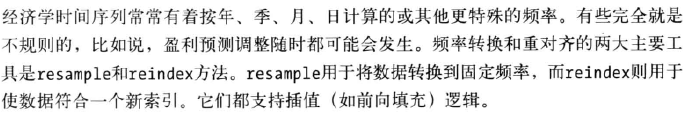

In [61]:
Image(filename="py35_picture\Operations with Time Series of Different Frequencies.png")

In [65]:
ts1 = pd.Series(np.random.randn(3), index=pd.date_range('2012-6-13', periods=3, freq='W-WED'))
ts1.resample('B').mean()  # 重采样到工作日（星期一到星期五）频率

2012-06-13    0.669223
2012-06-14         NaN
2012-06-15         NaN
2012-06-18         NaN
2012-06-19         NaN
2012-06-20   -0.502830
2012-06-21         NaN
2012-06-22         NaN
2012-06-25         NaN
2012-06-26         NaN
2012-06-27   -0.984298
Freq: B, dtype: float64

In [66]:
ts1.resample('B').mean().ffill()

2012-06-13    0.669223
2012-06-14    0.669223
2012-06-15    0.669223
2012-06-18    0.669223
2012-06-19    0.669223
2012-06-20   -0.502830
2012-06-21   -0.502830
2012-06-22   -0.502830
2012-06-25   -0.502830
2012-06-26   -0.502830
2012-06-27   -0.984298
Freq: B, dtype: float64

In [70]:
dates = pd.DatetimeIndex(['2012-6-12', '2012-6-17', '2012-6-18','2012-6-21', '2012-6-22', '2012-6-29'])
ts2 = pd.Series(np.random.randn(6), index=dates)
ts2 # 不规整样本（各时间点更一般化）

2012-06-12    0.931911
2012-06-17    0.342277
2012-06-18    0.172178
2012-06-21   -2.023318
2012-06-22   -0.154718
2012-06-29    1.018231
dtype: float64

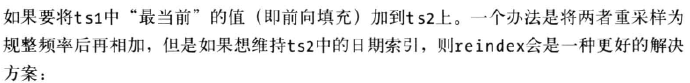

In [71]:
Image(filename="py35_picture\Operations with Time Series of Different Frequencies 2.png")

In [88]:
ts1.reindex(ts2.index, method='ffill')

2012-06-12         NaN
2012-06-17    0.669223
2012-06-18    0.669223
2012-06-21   -0.502830
2012-06-22   -0.502830
2012-06-29   -0.984298
dtype: float64

In [87]:
ts2 + ts1.reindex(ts2.index, method='ffill')

2012-06-12         NaN
2012-06-17    1.011500
2012-06-18    0.841401
2012-06-21   -2.526148
2012-06-22   -0.657547
2012-06-29    0.033934
dtype: float64

In [78]:
# 使用 period
gdp = pd.Series([1.78, 1.94, 2.08, 2.01, 2.15, 2.31, 2.46], index=pd.period_range('1984Q2', periods=7, freq='Q-SEP'))
infl = pd.Series([0.025, 0.045, 0.037, 0.04],index=pd.period_range('1982', periods=4, freq='A-DEC'))
print(gdp)
infl

1984Q2    1.78
1984Q3    1.94
1984Q4    2.08
1985Q1    2.01
1985Q2    2.15
1985Q3    2.31
1985Q4    2.46
Freq: Q-SEP, dtype: float64


1982    0.025
1983    0.045
1984    0.037
1985    0.040
Freq: A-DEC, dtype: float64

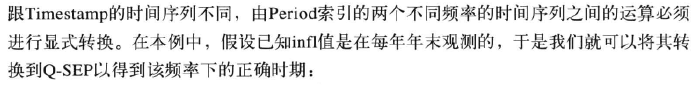

In [83]:
Image(filename="py35_picture\Operations with Time Series of Different Frequencies 3.png")

In [84]:
infl_q = infl.asfreq('Q-SEP', how='end')
infl_q

1983Q1    0.025
1984Q1    0.045
1985Q1    0.037
1986Q1    0.040
Freq: Q-SEP, dtype: float64

In [86]:
infl_q.reindex(gdp.index, method='ffill') # 时间序列可以被重索引（使用前向填充以匹配gdp）

1984Q2    0.045
1984Q3    0.045
1984Q4    0.045
1985Q1    0.037
1985Q2    0.037
1985Q3    0.037
1985Q4    0.037
Freq: Q-SEP, dtype: float64

### 3 时间和“最当前”数据选取

In [97]:
# 生成一个交易日内的日期范围和时间序列
rng = pd.date_range('2012-06-01 09:30', '2012-06-01 15:59', freq='T')

# 生成5天的时间点（9:30 - 15:59 之间的值）
rng = rng.append([rng + pd.offsets.BDay(i) for i in range(1, 4)])
ts = pd.Series(np.arange(len(rng), dtype=float), index=rng)
ts

2012-06-01 09:30:00       0.0
2012-06-01 09:31:00       1.0
2012-06-01 09:32:00       2.0
2012-06-01 09:33:00       3.0
2012-06-01 09:34:00       4.0
2012-06-01 09:35:00       5.0
2012-06-01 09:36:00       6.0
2012-06-01 09:37:00       7.0
2012-06-01 09:38:00       8.0
2012-06-01 09:39:00       9.0
2012-06-01 09:40:00      10.0
2012-06-01 09:41:00      11.0
2012-06-01 09:42:00      12.0
2012-06-01 09:43:00      13.0
2012-06-01 09:44:00      14.0
2012-06-01 09:45:00      15.0
2012-06-01 09:46:00      16.0
2012-06-01 09:47:00      17.0
2012-06-01 09:48:00      18.0
2012-06-01 09:49:00      19.0
2012-06-01 09:50:00      20.0
2012-06-01 09:51:00      21.0
2012-06-01 09:52:00      22.0
2012-06-01 09:53:00      23.0
2012-06-01 09:54:00      24.0
2012-06-01 09:55:00      25.0
2012-06-01 09:56:00      26.0
2012-06-01 09:57:00      27.0
2012-06-01 09:58:00      28.0
2012-06-01 09:59:00      29.0
                        ...  
2012-06-06 15:30:00    1530.0
2012-06-06 15:31:00    1531.0
2012-06-06

In [99]:
print(ts[time(10, 0)]) # datetime.time对象进行索引即可抽取出这些时间点上的值
print()
print(ts.at_time(time(10, 0)))
ts.between_time(time(10, 0), time(10, 1))

2012-06-01 10:00:00      30.0
2012-06-04 10:00:00     420.0
2012-06-05 10:00:00     810.0
2012-06-06 10:00:00    1200.0
dtype: float64

2012-06-01 10:00:00      30.0
2012-06-04 10:00:00     420.0
2012-06-05 10:00:00     810.0
2012-06-06 10:00:00    1200.0
dtype: float64


2012-06-01 10:00:00      30.0
2012-06-01 10:01:00      31.0
2012-06-04 10:00:00     420.0
2012-06-04 10:01:00     421.0
2012-06-05 10:00:00     810.0
2012-06-05 10:01:00     811.0
2012-06-06 10:00:00    1200.0
2012-06-06 10:01:00    1201.0
dtype: float64

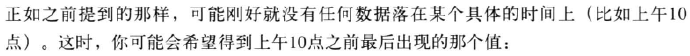

In [102]:
Image(filename="py35_picture\At moment.png")

In [104]:
# 将该时间序列的大部分内容随机设置为NA
indexer = np.sort(np.random.permutation(len(ts))[700:])
irr_ts = ts.copy()
irr_ts[indexer] = np.nan
irr_ts['2012-06-01 09:50':'2012-06-01 10:00']

2012-06-01 09:50:00     NaN
2012-06-01 09:51:00     NaN
2012-06-01 09:52:00     NaN
2012-06-01 09:53:00     NaN
2012-06-01 09:54:00     NaN
2012-06-01 09:55:00     NaN
2012-06-01 09:56:00    26.0
2012-06-01 09:57:00     NaN
2012-06-01 09:58:00    28.0
2012-06-01 09:59:00     NaN
2012-06-01 10:00:00    30.0
dtype: float64

In [105]:
# 如果将一组Timestamp传入asof方法，就能得到这些时间点处（或其之前最近）的有效值（非NA）
selection = pd.date_range('2012-06-01 10:00', periods=4, freq='B')
irr_ts.asof(selection)

2012-06-01 10:00:00      30.0
2012-06-04 10:00:00     419.0
2012-06-05 10:00:00     810.0
2012-06-06 10:00:00    1198.0
Freq: B, dtype: float64

### 4 拼接多个数据源

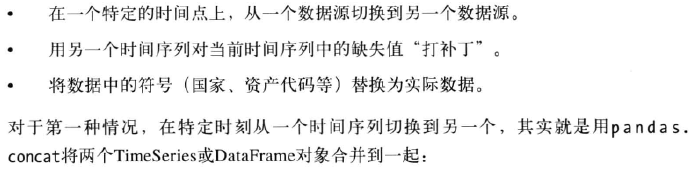

In [106]:
Image(filename="py35_picture\Splicing Together Data Sources.png")

In [119]:
data1 = pd.DataFrame(np.ones((6, 3), 
                   dtype=float),columns=['a', 'b', 'c'], 
                   index=pd.date_range('6/12/2012', periods=6))
data2 = pd.DataFrame(np.ones((6, 3), dtype=float) * 2,
                   columns=['a', 'b', 'c'],
                   index=pd.date_range('6/13/2012', periods=6))
spliced = pd.concat([data1.ix[:'2012-06-14'], data2.ix['2012-06-15':]])
spliced

,a,b,c
2012-06-12,1.0,1.0,1.0
2012-06-13,1.0,1.0,1.0
2012-06-14,1.0,1.0,1.0
2012-06-15,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0


In [122]:
# data1 缺失了 data2 中存在的某个时间序列
data2 = pd.DataFrame(np.ones((6, 4), dtype=float) * 2,
                  columns=['a', 'b', 'c', 'd'],
                  index=pd.date_range('6/13/2012', periods=6))
spliced = pd.concat([data1.ix[:'2012-06-14'], data2.ix['2012-06-15':]])
spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,NaN
2012-06-14,1.0,1.0,1.0,NaN
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [123]:
spliced_filled = spliced.combine_first(data2) # 引入合并点之前的数据
spliced_filled

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [124]:
spliced.update(data2, overwrite=False) #只想填充空洞
spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [125]:
cp_spliced = spliced.copy()
print(cp_spliced)
cp_spliced[['a', 'c']] = data1[['a', 'c']] # 直接对列进行设置
cp_spliced

              a    b    c    d
2012-06-12  1.0  1.0  1.0  NaN
2012-06-13  1.0  1.0  1.0  2.0
2012-06-14  1.0  1.0  1.0  2.0
2012-06-15  2.0  2.0  2.0  2.0
2012-06-16  2.0  2.0  2.0  2.0
2012-06-17  2.0  2.0  2.0  2.0
2012-06-18  2.0  2.0  2.0  2.0


,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,1.0,2.0,1.0,2.0
2012-06-16,1.0,2.0,1.0,2.0
2012-06-17,1.0,2.0,1.0,2.0
2012-06-18,NaN,2.0,NaN,2.0


### 5 收益指数和累计收益

In [142]:
prices = web.DataReader('AAPL','yahoo', '2011-01-01','2012-07-27') # 2011-2012 苹果公司的股票价格数据
price = web.DataReader('AAPL','yahoo', '2011-01-01','2012-07-27')['Adj Close']
print(price[-5:])
prices[-5:]

Date
2012-07-23    78.571124
2012-07-24    78.192467
2012-07-25    74.815825
2012-07-26    74.804116
2012-07-27    76.141758
Name: Adj Close, dtype: float64


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-07-23,594.399986,605.900009,587.710007,603.830002,121993900,78.571124
2012-07-24,607.379990,609.680016,598.509987,600.919975,141283100,78.192467
2012-07-25,574.459984,580.799995,570.000015,574.970009,219328200,74.815825
2012-07-26,579.760025,580.399986,570.360023,574.880020,101658200,74.804116
2012-07-27,575.010010,585.830017,571.590012,585.159988,100984100,76.141758


In [138]:
price['2011-10-03'] / price['2011-3-01'] - 1 # 计算两个时间点之间的累计百分比回报只需计算价格的百分比即可

0.072399878739767276

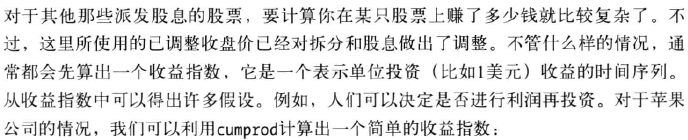

In [149]:
Image(filename="py35_picture\Return Indexes and Cumulative Returns.png")

In [184]:
returns = price.pct_change()
ret_index = (1 + returns).cumprod()
ret_index[0] = 1 # Set first value to 1
ret_index[:10]

Date
2011-01-03    1.000000
2011-01-04    1.005219
2011-01-05    1.013442
2011-01-06    1.012622
2011-01-07    1.019874
2011-01-10    1.039081
2011-01-11    1.036623
2011-01-12    1.045059
2011-01-13    1.048882
2011-01-14    1.057378
Name: Adj Close, dtype: float64

In [145]:
m_returns = ret_index.resample('BM').last().pct_change() # 计算指定时期内的累计收益
m_returns['2012']

Date
2012-01-31    0.127111
2012-02-29    0.188311
2012-03-30    0.105284
2012-04-30   -0.025970
2012-05-31   -0.010702
2012-06-29    0.010853
2012-07-31    0.001986
Freq: BM, Name: Adj Close, dtype: float64

In [148]:
m_rets = (1 + returns).resample('M', kind='period').prod() - 1 # 通过重采样聚合从日百分比变化中计算得出
m_rets['2012']

Date
2012-01    0.127111
2012-02    0.188311
2012-03    0.105284
2012-04   -0.025970
2012-05   -0.010702
2012-06    0.010853
2012-07    0.001986
Freq: M, Name: Adj Close, dtype: float64